In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Reshape
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
img_rows = 28
img_cols = 28
channels = 1

img_shape = (img_rows, img_cols, channels)

z_dim = 100   # size of noise vector z

In [7]:
# building the generator

def build_generator():
    model = Sequential()
    
    model.add(Dense(128, input_dim=z_dim))
    
    model.add(LeakyReLU(alpha=0.01))
    
    model.add(Dense(28 * 28 * 1, activation="tanh"))
    
    model.add(Reshape(img_shape))
    
    return model

In [8]:
# defining the discriminator

def build_discriminator():
    model = Sequential()
    
    model.add(Flatten(input_shape=img_shape))
    
    model.add(Dense(128))
    
    model.add(LeakyReLU(alpha=0.01))
    
    model.add(Dense(1, activation="sigmoid"))
    
    return model

In [9]:
# combined model

def build_gan(generator, discriminator):
    
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model


In [10]:
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(),metrics=['accuracy'])

generator = build_generator()
discriminator.trainable = False
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam())

In [11]:
losses = []
accuracies = []
iteration_checkpoints = []

def train(iterations, batch_size, sample_interval):
    (X_train, _), (_, _) = mnist.load_data()
    X_train = X_train / 127.5 - 1.0
    X_train = np.expand_dims(X_train, axis=3)
    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))
    for iteration in range(iterations):
        #  Train the Discriminator
        # Get a random batch of real images
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        # Train Discriminator
        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train the Generator
        # ---------------------

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        # Train Generator
        g_loss = gan.train_on_batch(z, real)

        if (iteration + 1) % sample_interval == 0:

            # Save losses and accuracies so they can be plotted after training
            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            # Output training progress
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            # Output a sample of generated image
            sample_images(generator)

In [12]:
def sample_images(generator, image_grid_rows=4, image_grid_columns=4):

    # Sample random noise
    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))

    # Generate images from random noise
    gen_imgs = generator.predict(z)

    # Rescale image pixel values to [0, 1]
    gen_imgs = 0.5 * gen_imgs + 0.5

    # Set image grid
    fig, axs = plt.subplots(image_grid_rows,
                            image_grid_columns,
                            figsize=(4, 4),
                            sharey=True,
                            sharex=True)

    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            # Output a grid of images
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1

C:\Users\dell\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
C:\Users\dell\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1000 [D loss: 0.062025, acc.: 100.00%] [G loss: 3.947153]
2000 [D loss: 0.038329, acc.: 99.61%] [G loss: 5.015705]
3000 [D loss: 0.039619, acc.: 99.61%] [G loss: 8.372647]
4000 [D loss: 0.112891, acc.: 96.09%] [G loss: 4.577548]
5000 [D loss: 0.240239, acc.: 91.41%] [G loss: 4.046618]
6000 [D loss: 0.393967, acc.: 85.94%] [G loss: 3.212158]
7000 [D loss: 0.445717, acc.: 81.25%] [G loss: 3.657552]
8000 [D loss: 0.273111, acc.: 89.06%] [G loss: 4.346355]
9000 [D loss: 0.210454, acc.: 92.19%] [G loss: 3.516770]
10000 [D loss: 0.254834, acc.: 88.28%] [G loss: 4.201492]
11000 [D loss: 0.317677, acc.: 87.89%] [G loss: 3.339163]
12000 [D loss: 0.409405, acc.: 83.98%] [G loss: 2.776164]
13000 [D loss: 0.146124, acc.: 94.92%] [G loss: 4.068887]
14000 [D loss: 0.360062, acc.: 81.64%] [G loss: 3.518016]
15000 [D loss: 0.267238, acc.: 89.45%] [G loss: 3.612171]
16000 [D loss: 0.280230, acc.: 88.28%] [G loss: 2.873442]
17000 [D loss: 0.442153, acc.: 80.86%] [G loss: 2.734355]
18000 [D loss: 0.29398

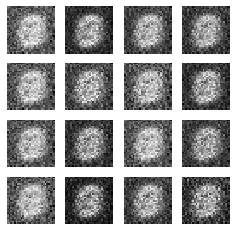

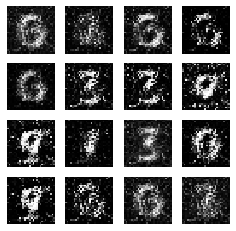

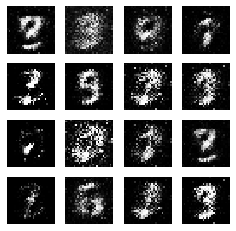

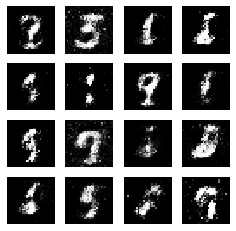

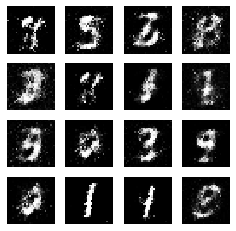

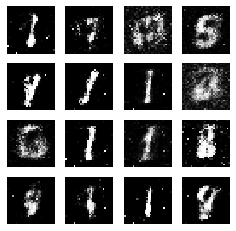

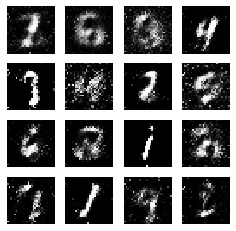

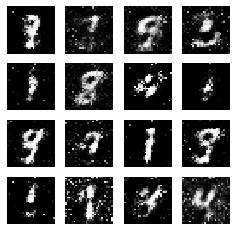

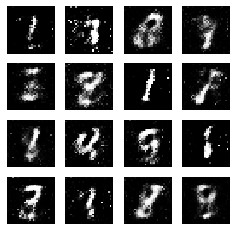

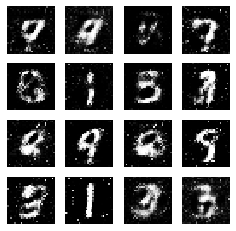

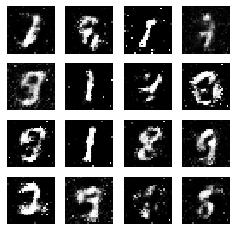

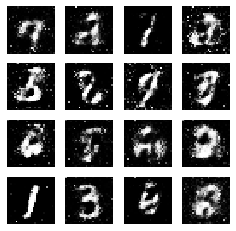

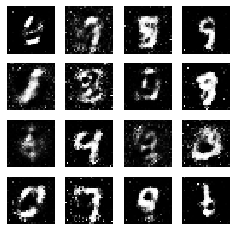

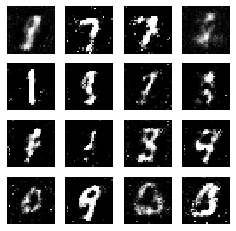

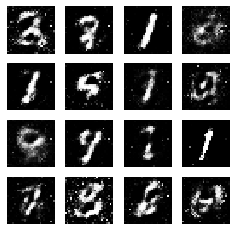

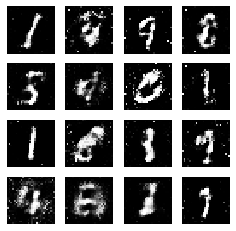

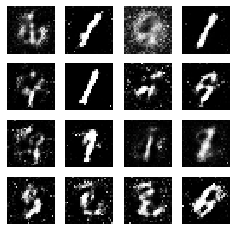

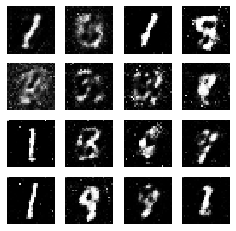

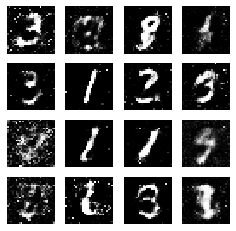

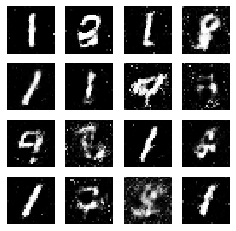

In [13]:
# Set hyperparameters
iterations = 20000
batch_size = 128
sample_interval = 1000

# Train the GAN for the specified number of iterations
train(iterations, batch_size, sample_interval)